In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [2]:
trader_df = pd.read_csv(r"C:\Users\saksh\OneDrive\Desktop\trader_behavior_assignment\Data\historical_data.csv")
sentiment_df = pd.read_csv(r"C:\Users\saksh\OneDrive\Desktop\trader_behavior_assignment\Data\fear_greed_index.csv")


In [3]:
trader_df.head()
sentiment_df.head()

trader_df.info()
sentiment_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [5]:
# Convert trader timestamp
trader_df['Timestamp IST'] = pd.to_datetime(
    trader_df['Timestamp IST'], errors='coerce'
)

trader_df['date'] = trader_df['Timestamp IST'].dt.date

# Convert sentiment date
sentiment_df['date'] = pd.to_datetime(
    sentiment_df['date'], errors='coerce'
).dt.date


In [6]:
merged_df = trader_df.merge(
    sentiment_df[['date', 'classification']],
    on='date',
    how='left'
)

merged_df.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12,Greed


In [7]:
merged_df['profit_flag'] = merged_df['Closed PnL'].apply(
    lambda x: 'Profit' if x > 0 else 'Loss'
)


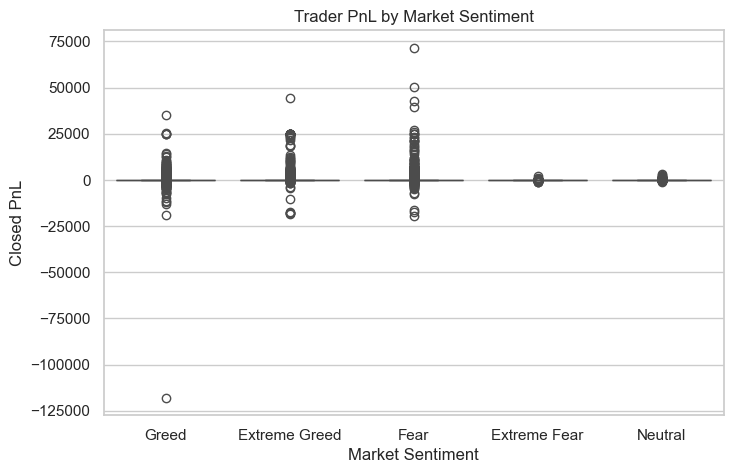

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=merged_df,
    x='classification',
    y='Closed PnL'
)
plt.title("Trader PnL by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Closed PnL")
plt.show()


In [9]:
win_rate = (
    merged_df
    .groupby('classification')['profit_flag']
    .value_counts(normalize=True)
    .unstack()
)

win_rate


profit_flag,Loss,Profit
classification,,
Extreme Fear,0.707223,0.292777
Extreme Greed,0.446718,0.553282
Fear,0.618213,0.381787
Greed,0.564293,0.435707
Neutral,0.505080,0.494920


In [10]:
merged_df.groupby('classification')['Size USD'].mean()


classification
Extreme Fear     4118.761840
Extreme Greed    3242.085086
Fear             5744.782685
Greed            5051.878829
Neutral          4332.202906
Name: Size USD, dtype: float64

In [11]:
merged_df['classification'].value_counts()


classification
Fear             13869
Greed            11292
Extreme Greed     5621
Neutral           2756
Extreme Fear      2326
Name: count, dtype: int64

In [12]:
account_performance = (
    merged_df
    .groupby(['Account', 'classification'])['Closed PnL']
    .sum()
    .reset_index()
)

account_performance.head()


,Account,classification,Closed PnL
0,0x083384f897ee0f19899168e3b1bec365f52a9012,Extreme Greed,0.000000e+00
1,0x083384f897ee0f19899168e3b1bec365f52a9012,Fear,1.010607e+06
2,0x083384f897ee0f19899168e3b1bec365f52a9012,Greed,-4.501787e+04
3,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,Extreme Fear,0.000000e+00
4,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,Fear,2.826578e+03
